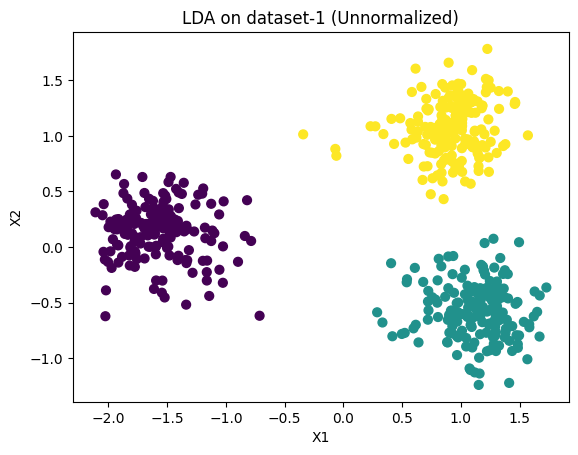

In [2]:
#LDA without normalization

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import eig
import operator
import math
import csv

data=pd.read_csv('dataset_1.csv',header=None,sep='\t')

dat=data

dim=len(dat.columns)-1
points=len(dat.index)

col=dat[dat.columns[dim]]
labels=col.tolist()

dat.drop(dat.columns[[64]],axis=1,inplace=True)

t=dat.values.tolist()

classes=set(labels)
classnum=len(list(classes))

totmean=[]
for i in range(0,dim):
  col=dat[dat.columns[i]]
  x=col.tolist()
  avg=[]
  avg.append(np.average(x))
  totmean.append(avg)

X=[]
for i in range(0,classnum):
  a=[]
  for j in range(0,dim):
    a.append([])
  X.append(a)

for i in range(0,points):
  for j in range(0,dim):
    X[int(labels[i])][j].append(t[i][j]-totmean[j][0])

totmean=[]
for i in range(0,dim):
  avg=[]
  sum=0
  for j in range(0,classnum):
    sum=sum+np.sum(X[j][i])
  avg.append(sum/points)
  totmean.append(avg)


means=[]
for i in range(0,classnum):
  mean=[]
  for j in range(0,dim):
    avg=[]
    avg.append(np.average(X[i][j]))
    mean.append(avg)
  
  means.append(mean)

SW=[]
for i in range(0,classnum):
  mean=means[i]

  for j in range(0,len(X[i][0])):
    mat=[]
    pnt=[]

    for k in range(0,dim):
      pnt.append(X[i][k][j])
    
    mat.append(pnt)

    datmat=np.transpose(mat)

    a=np.subtract(datmat,mean)
    at=np.transpose(a)

    b=np.dot(a,at)

    if i==0 and j==0:
      SW=b
    else:
      SW=np.add(SW,b)

SB=[]
for i in range(0,classnum):
  N=len(X[i][0])
  mean=means[i]

  a=np.subtract(mean,totmean)
  at=np.transpose(a)
  b=np.dot(a,at)
  b=np.multiply(b,N)

  if i==0:
    SB=b
  else:
    SB=np.add(SB,b)

SWinv=np.linalg.pinv(SW)

com=np.dot(SWinv,SB)

eigenvals,eigenvecs=np.linalg.eig(com)

idx=eigenvals.argsort()[::-1]
eigenvals=eigenvals[idx]
eigenvecs=eigenvecs[:,idx]


eigenvecs=np.transpose(eigenvecs)

eigenvecs=eigenvecs.real

W=[]
for i in range(0,2):
  W.append(eigenvecs[i])

W=np.transpose(W)

Y=np.dot(t,W)
Y=np.transpose(Y)

x=Y[0]
y=Y[1]

plt.scatter(x,y,c=labels,s=40,cmap='viridis')
plt.title('LDA on dataset-1 (Unnormalized)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


df=pd.DataFrame({'X':x,'Y':y,'label':labels})

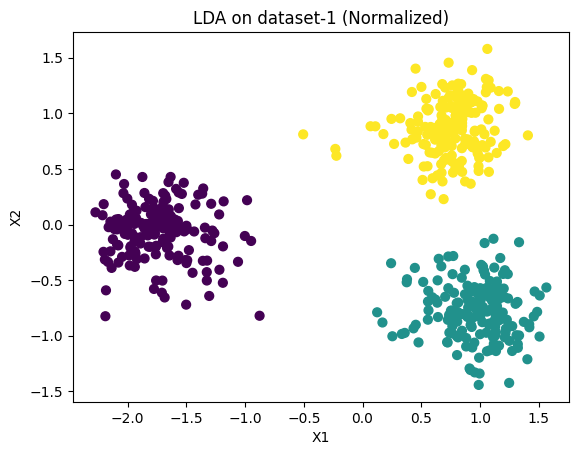

In [3]:
#LDA with normalization version-1

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import eig
import operator
import math
import csv

data=pd.read_csv('dataset_1.csv',header=None,sep='\t')

dat=data

dim=len(dat.columns)-1
points=len(dat.index)

col=dat[dat.columns[dim]]
labels=col.tolist()

dat.drop(dat.columns[[64]],axis=1,inplace=True)

t=dat.values.tolist()

classes=set(labels)
classnum=len(list(classes))

totmean=[]
for i in range(0,dim):
  col=dat[dat.columns[i]]
  x=col.tolist()
  avg=[]
  avg.append(np.average(x))
  totmean.append(avg)

X=[]
for i in range(0,classnum):
  a=[]
  for j in range(0,dim):
    a.append([])
  X.append(a)

for i in range(0,points):
  for j in range(0,dim):
    t[i][j]=t[i][j]-totmean[j][0]
    X[int(labels[i])][j].append(t[i][j])

totmean=[]
for i in range(0,dim):
  avg=[]
  sum=0
  for j in range(0,classnum):
    sum=sum+np.sum(X[j][i])
  avg.append(sum/points)
  totmean.append(avg)


means=[]
for i in range(0,classnum):
  mean=[]
  for j in range(0,dim):
    avg=[]
    avg.append(np.average(X[i][j]))
    mean.append(avg)
  
  means.append(mean)

SW=[]
for i in range(0,classnum):
  mean=means[i]

  for j in range(0,len(X[i][0])):
    mat=[]
    pnt=[]

    for k in range(0,dim):
      pnt.append(X[i][k][j])
    
    mat.append(pnt)

    datmat=np.transpose(mat)

    a=np.subtract(datmat,mean)
    at=np.transpose(a)

    b=np.dot(a,at)

    if i==0 and j==0:
      SW=b
    else:
      SW=np.add(SW,b)

SB=[]
for i in range(0,classnum):
  N=len(X[i][0])
  mean=means[i]

  a=np.subtract(mean,totmean)
  at=np.transpose(a)
  b=np.dot(a,at)
  b=np.multiply(b,N)

  if i==0:
    SB=b
  else:
    SB=np.add(SB,b)

SWinv=np.linalg.pinv(SW)

com=np.dot(SWinv,SB)

eigenvals,eigenvecs=np.linalg.eig(com)

idx=eigenvals.argsort()[::-1]
eigenvals=eigenvals[idx]
eigenvecs=eigenvecs[:,idx]


eigenvecs=np.transpose(eigenvecs)

eigenvecs=eigenvecs.real

W=[]
for i in range(0,2):
  W.append(eigenvecs[i])

W=np.transpose(W)

Y=np.dot(t,W)
Y=np.transpose(Y)

x=Y[0]
y=Y[1]

plt.scatter(x,y,c=labels,s=40,cmap='viridis')
plt.title('LDA on dataset-1 (Normalized)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

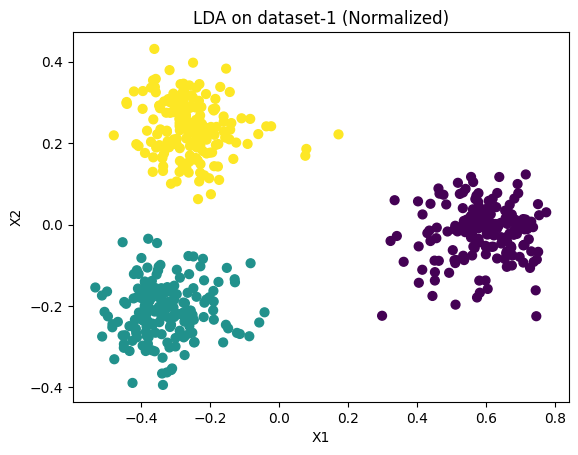

In [5]:
#LDA with normalization version-2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import eig
import statistics
import operator
import math
import csv

data=pd.read_csv('dataset_1.csv',header=None,sep='\t')

dat=data

dim=len(dat.columns)-1
points=len(dat.index)

col=dat[dat.columns[dim]]
labels=col.tolist()

dat.drop(dat.columns[[64]],axis=1,inplace=True)

t=dat.values.tolist()

classes=set(labels)
classnum=len(list(classes))

totmean=[]
for i in range(0,dim):
  col=dat[dat.columns[i]]
  x=col.tolist()
  avg=[]
  avg.append(np.average(x))
  totmean.append(avg)

totcovar=[]
for i in range(0,dim):
  col=dat[dat.columns[i]]
  x=col.tolist()
  var=[]
  var.append(statistics.variance(x))
  totcovar.append(var)

X=[]
for i in range(0,classnum):
  a=[]
  for j in range(0,dim):
    a.append([])
  X.append(a)

for i in range(0,points):
  for j in range(0,dim):
    if totcovar[j][0]==0:
      t[i][j]=0
    else:
      t[i][j]=(t[i][j]-totmean[j][0])/((totcovar[j][0]))
    X[int(labels[i])][j].append(t[i][j])

totmean=[]
for i in range(0,dim):
  avg=[]
  sum=0
  for j in range(0,classnum):
    sum=sum+np.sum(X[j][i])
  avg.append(sum/points)
  totmean.append(avg)


means=[]
for i in range(0,classnum):
  mean=[]
  for j in range(0,dim):
    avg=[]
    avg.append(np.average(X[i][j]))
    mean.append(avg)
  
  means.append(mean)

SW=[]
for i in range(0,classnum):
  mean=means[i]

  for j in range(0,len(X[i][0])):
    mat=[]
    pnt=[]

    for k in range(0,dim):
      pnt.append(X[i][k][j])
    
    mat.append(pnt)

    datmat=np.transpose(mat)

    a=np.subtract(datmat,mean)
    at=np.transpose(a)

    b=np.dot(a,at)

    if i==0 and j==0:
      SW=b
    else:
      SW=np.add(SW,b)

SB=[]
for i in range(0,classnum):
  N=len(X[i][0])
  mean=means[i]

  a=np.subtract(mean,totmean)
  at=np.transpose(a)
  b=np.dot(a,at)
  b=np.multiply(b,N)

  if i==0:
    SB=b
  else:
    SB=np.add(SB,b)

SWinv=np.linalg.pinv(SW)

com=np.dot(SWinv,SB)

eigenvals,eigenvecs=np.linalg.eig(com)

idx=eigenvals.argsort()[::-1]
eigenvals=eigenvals[idx]
eigenvecs=eigenvecs[:,idx]


eigenvecs=np.transpose(eigenvecs)

eigenvecs=eigenvecs.real

W=[]
for i in range(0,2):
  W.append(eigenvecs[i])

W=np.transpose(W)

Y=np.dot(t,W)
Y=np.transpose(Y)

x=Y[0]
y=Y[1]

plt.scatter(x,y,c=labels,s=40,cmap='viridis')
plt.title('LDA on dataset-1 (Normalized)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

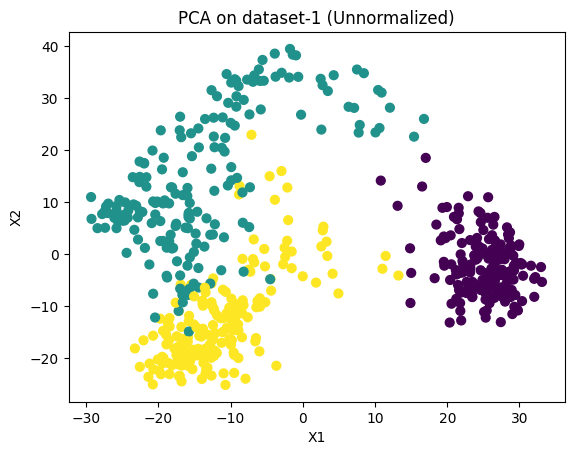

In [ ]:
#PCA without normalization

import numpy as np
from sklearn.decomposition import PCA

t=data.values.tolist()

pca=PCA(n_components=2)
pca.fit(t)

tdat=pca.transform(t)

tdat=np.transpose(tdat)

x=tdat[0]
y=tdat[1]

plt.scatter(x,y,c=labels,s=40,cmap='viridis')
plt.title('PCA on dataset-1 (Unnormalized)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


Train Data Accuracy = 100.0%

Test Data Accuracy = 100.0%



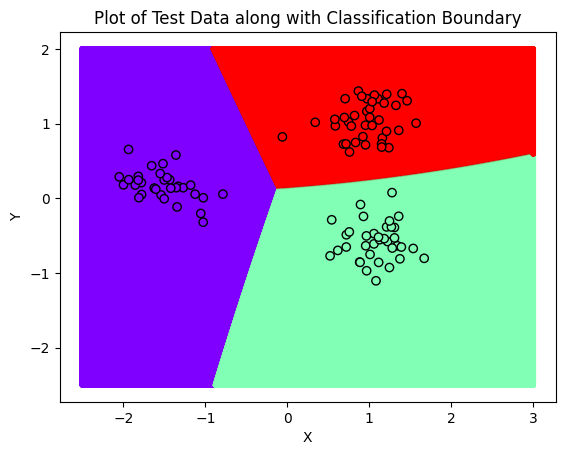

Train Confusion Matrix for train data is
[[146.   0.   0.]
 [  0. 146.   0.]
 [  0.   0. 137.]]

Test Confusion Matrix for test data is
[[32.  0.  0.]
 [ 0. 36.  0.]
 [ 0.  0. 40.]]


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv

data,test_data = train_test_split(df, test_size=0.2, random_state=42)

tdata = data

class naive_bayes: 
    def __init__(self,dat):
        self.data = dat.values

        col1 = dat[dat.columns[0]]
        tx = col1.tolist()
        col2 = dat[dat.columns[1]]
        ty = col2.tolist()
        col3 = dat[dat.columns[2]]
        classes = col3.tolist()

        cset = set(classes)

        self.clist = list(cset)
        self.classnum=len(cset)

        dfs=[]
        for i in cset:
          dfs.append(dat[dat["label"]==i])

        xs=[]
        ys=[]
        for i in range(0,self.classnum):
          col1=dfs[i][dfs[i].columns[0]]
          col2=dfs[i][dfs[i].columns[1]]

          xs.append(col1.tolist())
          ys.append(col2.tolist())

        prob=[]

        for i in range(0,self.classnum):
          prob.append(len(xs[i])/len(tx))

        covariance=[]

        for i in range(0,self.classnum):
          cov=np.zeros((2,2))

          cov[0][0]=np.cov(xs[i])
          cov[1][1]=np.cov(ys[i])

          covariance.append(cov)

        inverse=[]

        for i in range(0,self.classnum):
          inv=np.linalg.inv(covariance[i])

          inverse.append(inv)

        meanx=[]
        meany=[]

        for i in range(0,self.classnum):
          meanx.append(np.average(xs[i]))
          meany.append(np.average(ys[i]))

        den=[]

        for i in range(0,self.classnum):
          den.append(2*math.pi*(math.sqrt(np.linalg.det(covariance[i]))))

        meanmatrices=[]

        for i in range(0,self.classnum):
          mean=np.zeros((2,1))

          mean[0][0]=meanx[i]
          mean[1][0]=meany[i]

          meanmatrices.append(mean)

        self.dfs=dfs
        self.xs=xs
        self.ys=ys
        self.den=den
        self.covariance=covariance
        self.inverse=inverse
        self.meanmatrices=meanmatrices
        self.prob=prob

    def predict(self,point):
        # print(l)
        x = point[0]
        y = point[1]

        pointmatrix=np.zeros((2,1))

        pointmatrix[0][0]=x
        pointmatrix[1][0]=y

        p=[]

        for j in range(0,self.classnum):
          a=np.subtract(pointmatrix,self.meanmatrices[j])
          at=np.transpose(a)
          b=np.dot(at,self.inverse[j])
          c=np.dot(b,a)
          num=math.exp(-0.5*c[0][0])

          p.append((num/self.den[j])*self.prob[j])

        return self.clist[p.index(max(p))]
        
    def train_error(self):
        count = 0
        for i in range(len(self.data)):
            if self.predict([self.data[i][0],self.data[i][1]]) != self.data[i][2]:
                count+=1
        return count/len(self.data)

    def test_error(self,l):
        count = 0
        for i in range(len(l)):
            # if i==0:
            #     print(l[i][0],l[i][1],l[i][2])
            if self.predict([l[i][0],l[i][1]]) != l[i][2]:
                count+=1
        return count/len(l)
        

    def predict_list(self,l):
        ans = []
        for i in l:
            # print(i)
            ans.append(self.predict(i))
        return ans

predictor = naive_bayes(dat=tdata)

l= []
for i in range(-2500,3000):
    for j in range(-2500,2000):
        l.append([i/1000,j/1000])

new_points = np.array(l)
trainerror = predictor.train_error()
testerror = predictor.test_error(test_data.values)
predictions = predictor.predict_list(l)

print("\nTrain Data Accuracy = ",100-trainerror*100,"%\n",sep="")
print("Test Data Accuracy = ",100-testerror*100,"%\n",sep="")


X = test_data[['X', 'Y']].values
y = test_data['label'].values
plt.scatter(new_points[:, 0], new_points[:, 1], c=predictions, marker='.', cmap='rainbow',label='decision boundary')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow',marker = 'o', edgecolor="black",label='Test Data')
plt.title('Plot of Test Data along with Classification Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#defining the funciton to calculate the confusion matrix

def confusion_matrix(y_true, y_pred):
    matrix = np.zeros((3, 3))
    for i in range(len(y_true)):
        actual = int(y_true[i])
        predicted = int(y_pred[i])
        # print(actual,predicted)
        matrix[actual][predicted] += 1
    return matrix

#calculating the confusion matrix for train and test data and printing them
train_pred = predictor.predict_list(tdata.values[:,:2])
test_pred = predictor.predict_list(test_data.values[:,:2])

train_confusion = confusion_matrix(tdata.values[:,2], train_pred)
test_confusion = confusion_matrix(test_data.values[:,2], test_pred)

print("Train Confusion Matrix for train data is")
print(train_confusion)
print()

print("Test Confusion Matrix for test data is")
print(test_confusion)


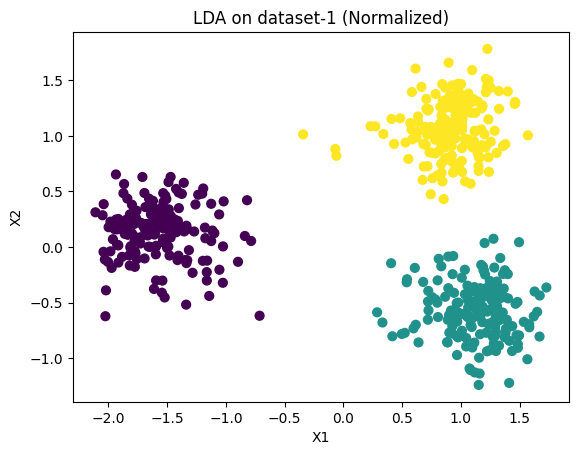

In [ ]:
#LDA with normalization version-1

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import eig
import operator
import math
import csv

data=pd.read_csv('dataset_1.csv',header=None,sep='\t')

dat=data

dim=len(dat.columns)-1
points=len(dat.index)

col=dat[dat.columns[dim]]
labels=col.tolist()

dat.drop(dat.columns[[64]],axis=1,inplace=True)

t=dat.values.tolist()

classes=set(labels)
classnum=len(list(classes))

totmean=[]
for i in range(0,dim):
  col=dat[dat.columns[i]]
  x=col.tolist()
  avg=[]
  avg.append(np.average(x))
  totmean.append(avg)

X=[]
for i in range(0,classnum):
  a=[]
  for j in range(0,dim):
    a.append([])
  X.append(a)

for i in range(0,points):
  for j in range(0,dim):
    X[int(labels[i])][j].append(t[i][j]-totmean[j][0])

totmean=[]
for i in range(0,dim):
  avg=[]
  sum=0
  for j in range(0,classnum):
    sum=sum+np.sum(X[j][i])
  avg.append(sum/points)
  totmean.append(avg)


means=[]
for i in range(0,classnum):
  mean=[]
  for j in range(0,dim):
    avg=[]
    avg.append(np.average(X[i][j]))
    mean.append(avg)
  
  means.append(mean)

SW=[]
for i in range(0,classnum):
  mean=means[i]

  for j in range(0,len(X[i][0])):
    mat=[]
    pnt=[]

    for k in range(0,dim):
      pnt.append(X[i][k][j])
    
    mat.append(pnt)

    datmat=np.transpose(mat)

    a=np.subtract(datmat,mean)
    at=np.transpose(a)

    b=np.dot(a,at)

    if i==0 and j==0:
      SW=b
    else:
      SW=np.add(SW,b)

SB=[]
for i in range(0,classnum):
  N=len(X[i][0])
  mean=means[i]

  a=np.subtract(mean,totmean)
  at=np.transpose(a)
  b=np.dot(a,at)
  b=np.multiply(b,N)

  if i==0:
    SB=b
  else:
    SB=np.add(SB,b)

SWinv=np.linalg.pinv(SW)

com=np.dot(SWinv,SB)

eigenvals,eigenvecs=np.linalg.eig(com)

idx=eigenvals.argsort()[::-1]
eigenvals=eigenvals[idx]
eigenvecs=eigenvecs[:,idx]


eigenvecs=np.transpose(eigenvecs)

eigenvecs=eigenvecs.real

W=[]
for i in range(0,2):
  W.append(eigenvecs[i])

W=np.transpose(W)

Y=np.dot(t,W)
Y=np.transpose(Y)

x=Y[0]
y=Y[1]

plt.scatter(x,y,c=labels,s=40,cmap='viridis')
plt.title('LDA on dataset-1 (Normalized)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

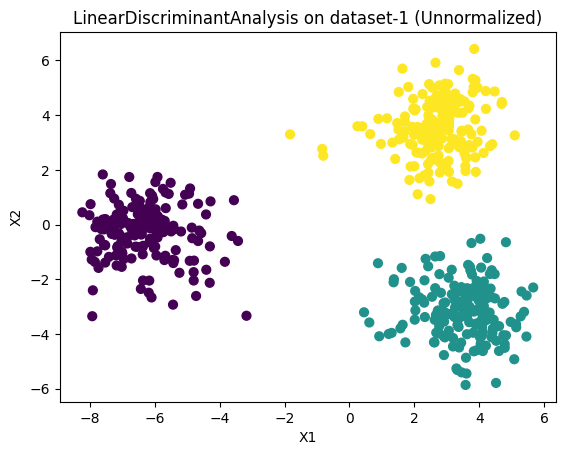

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t=data.values.tolist()

pca=LinearDiscriminantAnalysis(n_components=2)
pca.fit(t,labels)

tdat=pca.transform(t)

tdat=np.transpose(tdat)

x=tdat[0]
y=tdat[1]

plt.scatter(x,y,c=labels,s=40,cmap='viridis')
plt.title('LinearDiscriminantAnalysis on dataset-1 (Unnormalized)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Python 3.10.11
